In [ ]:
## Notebook env: mirtud_env (R kernel)

In [7]:
library(tidyr)
library(dplyr)
library(ggplot2)
library(ggpubr)
library(rstatix)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter




In [44]:
flowjo_adjusted_cell_count_chisq = read.csv('/home/ssobti/projects/mir_tud/wetlab_followup_data/cellcycle/041724_tRF_chi_sq_cellcycle_flowjo_cell_counts_refined_benedict.csv', header = F)
colnames(flowjo_adjusted_cell_count_chisq) = flowjo_adjusted_cell_count_chisq[1,]
flowjo_adjusted_cell_count_chisq = flowjo_adjusted_cell_count_chisq[-1,]
flowjo_adjusted_cell_count_chisq = t(flowjo_adjusted_cell_count_chisq)
colnames(flowjo_adjusted_cell_count_chisq) = flowjo_adjusted_cell_count_chisq[1,]
flowjo_adjusted_cell_count_chisq = flowjo_adjusted_cell_count_chisq[-1,]
flowjo_adjusted_cell_count_chisq

,Non-targeting control,tRNA-Cys-GCA-4-1.2t,tRNA-Gly-TCC-(6)2-1.2t,tRNA-Gln-TTG-(3)3-1.2t,tRNA-Arg-CCT-3-1.lh,tRNA-Arg-ACG-(3)1-1.2t
G1,4697,4434,3968,4251,4334,3968
Other cell cycle stages,3782,4044,4014,3727,3936,4427


In [ ]:
cell_pcts = read.csv('/home/ssobti/projects/mir_tud/wetlab_followup_data/cellcycle/041724_tRF_cellcycle_percentages_flowjo_benedict.csv', header = F)
colnames(cell_pcts) = cell_pcts[1,]
cell_pcts = cell_pcts[-1,]
head(cell_pcts)

cell_pcts_plot_df = cell_pcts %>% pivot_longer(cols = -Phase, names_to = 'TuD', values_to = 'pct')
cell_pcts_plot_df$TuD = factor(cell_pcts_plot_df$TuD, levels = colnames(cell_pcts)[-1])

cell_pcts_plot_df$pct = as.numeric(cell_pcts_plot_df$pct)
cell_pcts_plot_df = cell_pcts_plot_df %>% filter(pct != 0)
## remove all zeroes as those are not actual measured points but imputed values to make original dataframe not have missing values since columns in dfs need to have same lengths
#saveRDS(cell_pcts_plot_df, '/home/ssobti/projects/mir_tud/fig_output/data/fig3/flojo_benedict_cell_pcts_plot_df.rds')

head(cell_pcts_plot_df)

,Phase,Non-targeting control,tRNA-Cys-GCA-4-1.2t,tRNA-Gly-TCC-(6)2-1.2t,tRNA-Gln-TTG-(3)3-1.2t,tRNA-Arg-CCT-3-1.lh,tRNA-Arg-ACG-(3)1-1.2t
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,G1,0,0,0,0,0,0
3,G1,53,49.8,51.6,49.9,51.3,54.5
4,G1,53.2,48.6,55.4,47.8,54.4,55
5,G1,58.8,51.7,51.1,45.6,52.6,51.5
6,G1,58,0,0,0,0,0
7,G1,57.1,0,0,0,0,0


Phase,TuD,pct
<chr>,<fct>,<dbl>
G1,Non-targeting control,53.0
G1,tRNA-Cys-GCA-4-1.2t,49.8
G1,tRNA-Gly-TCC-(6)2-1.2t,51.6
G1,tRNA-Gln-TTG-(3)3-1.2t,49.9
G1,tRNA-Arg-CCT-3-1.lh,51.3
G1,tRNA-Arg-ACG-(3)1-1.2t,54.5


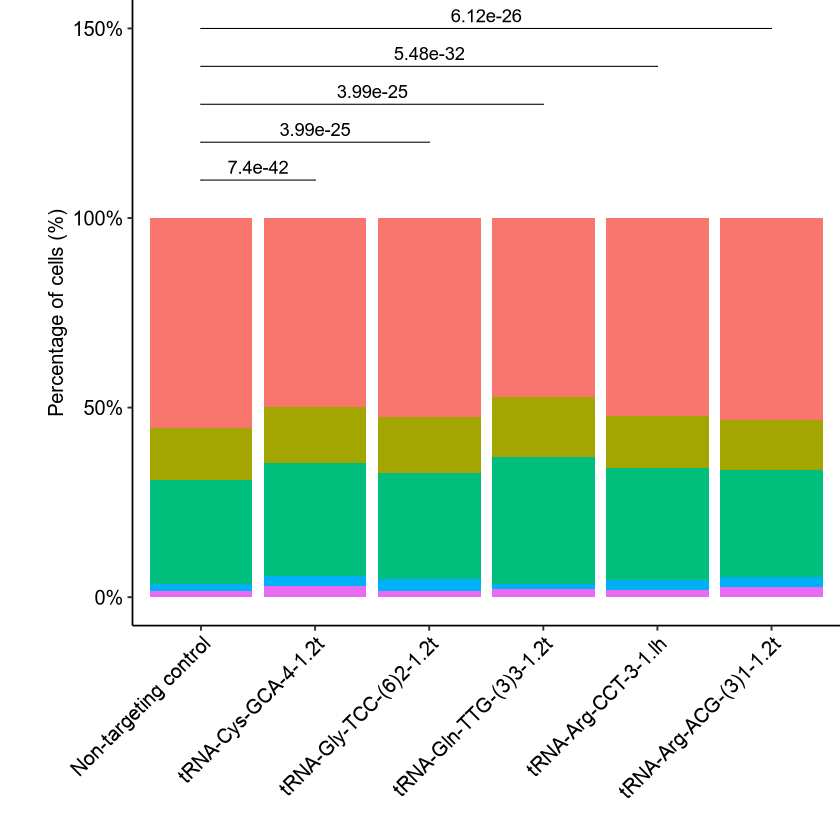

In [ ]:
#saveRDS(flowjo_adjusted_cell_count_chisq, '/home/ssobti/projects/mir_tud/fig_output/data/fig3/flowjo_benedict_adjusted_cell_count_chisq.rds')
#saveRDS(cell_pcts_plot_df, '/home/ssobti/projects/mir_tud/fig_output/data/fig3/flojo_benedict_cell_pcts_plot_df.rds') 

pvals = vector()
for(i in 1:length(colnames(flowjo_adjusted_cell_count_chisq)[-1])){
    pvals[i] = chisq_test(as.numeric(flowjo_adjusted_cell_count_chisq[,c(1,i)]))$p
}
pvals = p.adjust(pvals, method = 'BH')

stat.test = tibble(
  group1 = rep(colnames(flowjo_adjusted_cell_count_chisq)[1], 5),
  group2 = colnames(flowjo_adjusted_cell_count_chisq)[-1],
  p.adj = signif(pvals, 3),
  y.position = seq(1.1, 1.5, length.out = 5)
)

ggplot(cell_pcts_plot_df, aes(fill = Phase, y = pct, x = TuD)) + 
    geom_bar(position = "fill", stat = "identity", show.legend = F) + scale_y_continuous(labels = scales::percent_format(accuracy = 1)) + theme_pubr() + stat_pvalue_manual(stat.test, label = 'p.adj', tip.length = 0, inherit.aes = F) +
    theme(plot.margin = unit(c(0, 0, 0, 0.4), 'in'), plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1)) + xlab('') + ylab('Percentage of cells (%)')